In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
latest_data = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_data

('2017-08-23',)

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
lastyr = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
Precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= lastyr).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
pa_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation'])
pa_df.set_index('Date', inplace=True)
                                             
# Sort the dataframe by date
pa_df=pa_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data




Text(0, 0.5, 'Inches')

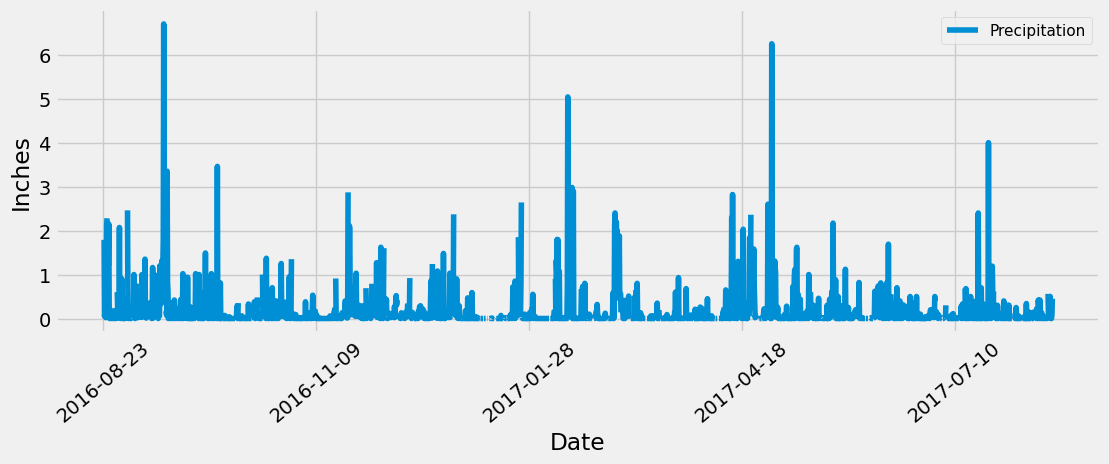

In [45]:
# Use Pandas to calculate the summary statistics for the precipitation data
y_axis = np.arange(0,max(pa_df['Precipitation']))
ytick_location = [value for value in y_axis]
ax1=pa_df.plot(figsize=(12,4))
ax1.legend(fontsize = 11)
# ax1 = plt.subplots(figsize=(18,5))

plt.yticks(ytick_location)
plt.xticks(rotation=40)
plt.ylabel("Inches")


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()